<a href="https://colab.research.google.com/github/AbhinavShakunt/MY_Data_Science_Notebooks/blob/main/tensorflow_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)


10000

In [ ]:
y_train[0]

5

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

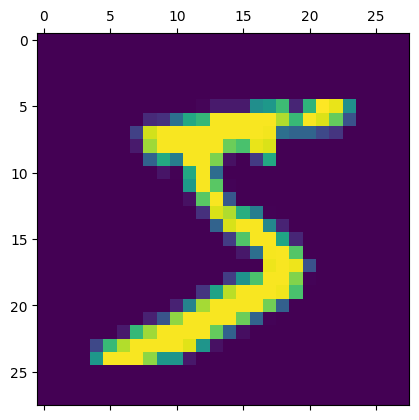

In [ ]:
plt.matshow(X_train[0])

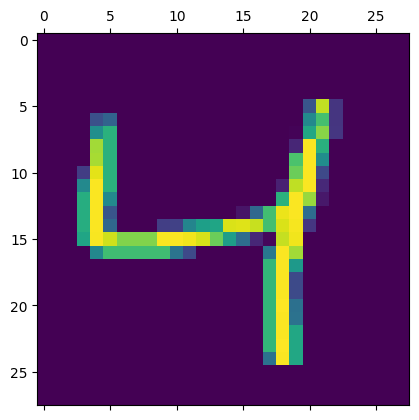

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4650 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9261


[0.26715245842933655, 0.9261000156402588]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.33277101e-02, 4.79821438e-07, 7.89553896e-02, 9.67118800e-01,
       1.91861845e-03, 1.08999774e-01, 2.02181081e-06, 9.99804974e-01,
       1.11689948e-01, 7.15751529e-01], dtype=float32)

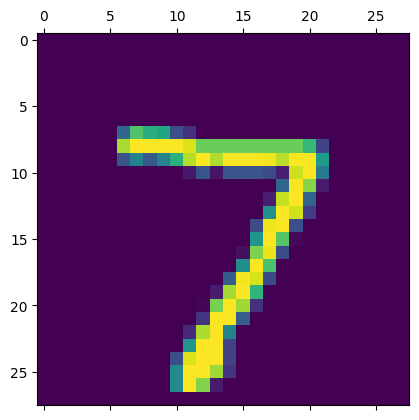

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    6,    7,    3,    3,    1],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    9,  922,   19,    6,    3,   13,   12,   42,    3],
       [   1,    0,   13,  932,    0,   19,    2,   13,   24,    6],
       [   1,    1,    3,    1,  909,    0,   12,    7,   10,   38],
       [   7,    2,    2,   45,   10,  761,   18,    9,   31,    7],
       [   9,    3,    6,    1,    7,   12,  917,    2,    1,    0],
       [   1,    5,   23,    5,    4,    0,    0,  963,    3,   24],
       [   5,    7,    7,   25,    9,   19,    9,   12,  875,    6],
       [  10,    7,    1,   11,   23,    6,    0,   29,    6,  916]],
      dtype=int32)>

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

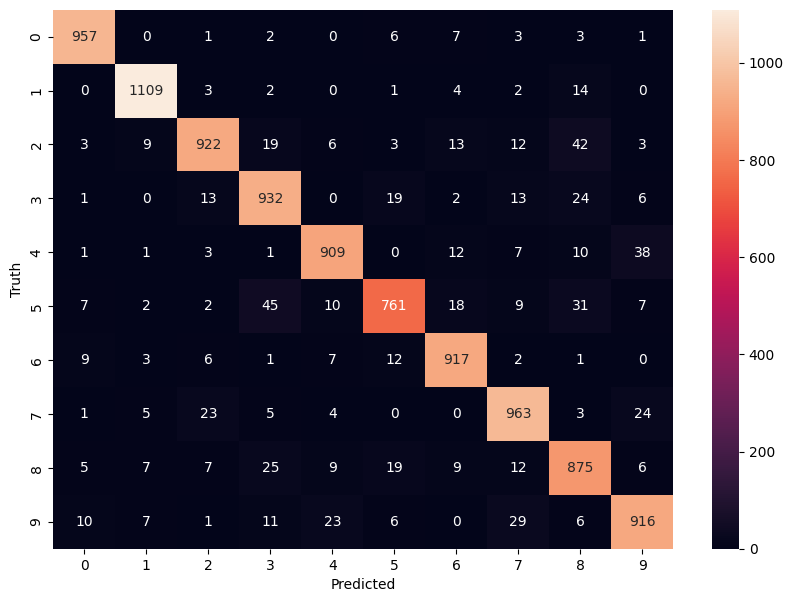

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2676 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1237 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9827


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9743


[0.07927737385034561, 0.9743000268936157]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

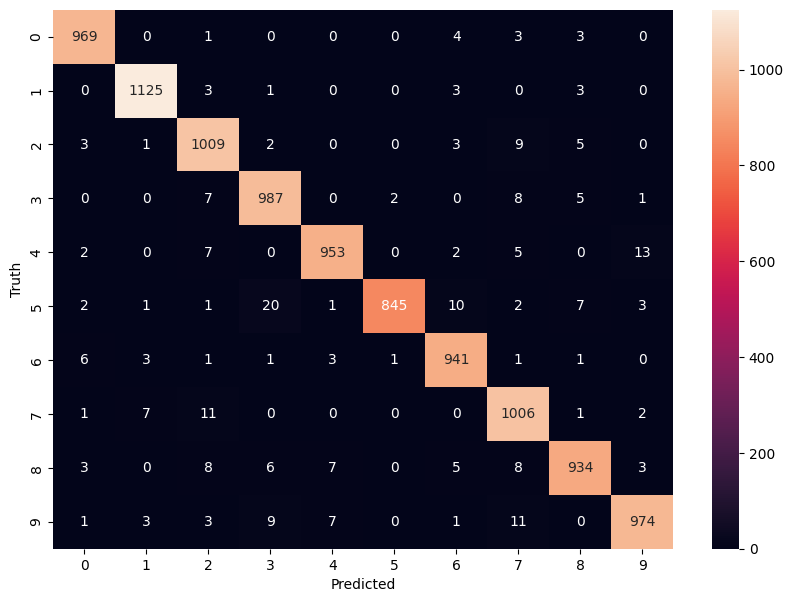

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2773 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1275 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0889 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0673 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0538 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0352 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0841 - accuracy: 0.9771


[0.08407747000455856, 0.9771000146865845]

Text(95.72222222222221, 0.5, 'Truth')

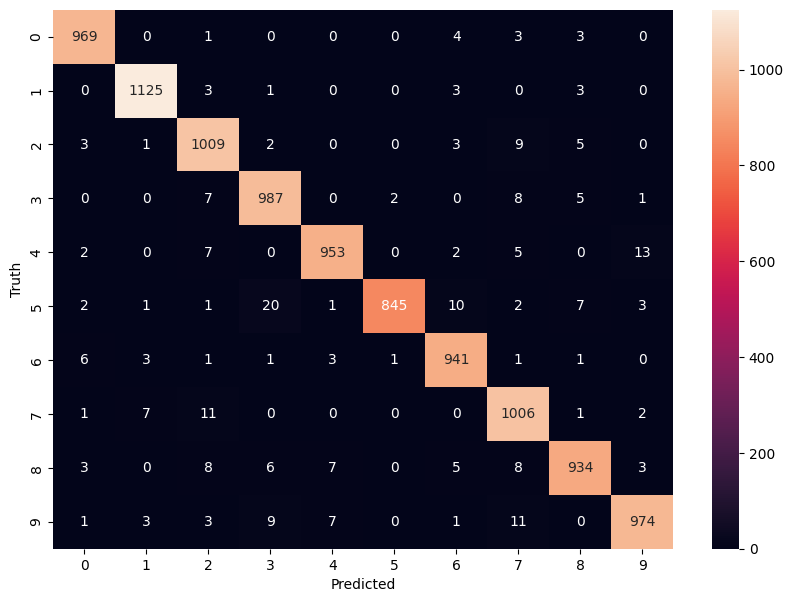

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')